<a href="https://colab.research.google.com/github/bouguerraimen/Facial-Emotional-Detection/blob/main/trashdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FSsyqqq2L2hwNZaaQaX6")
project = rf.workspace("mae-148-h0bzc").project("trash-detection-3cda1")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 119.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trash-Detection-1 in yolov11:: 100%|██████████| 2194/2194 [00:00<00:00, 6951.02it/s]


In [3]:
from ultralytics import YOLO

# 🧠 Charger un modèle YOLOv11 pré-entraîné
model = YOLO("yolo11s.pt")   # tu peux changer en yolo11s.pt etc.

# 🚀 Entraînement
model.train(
    data="/content/Trash-Detection-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="yolov11",
    device=0
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Trash-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, ke

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa5068dd490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

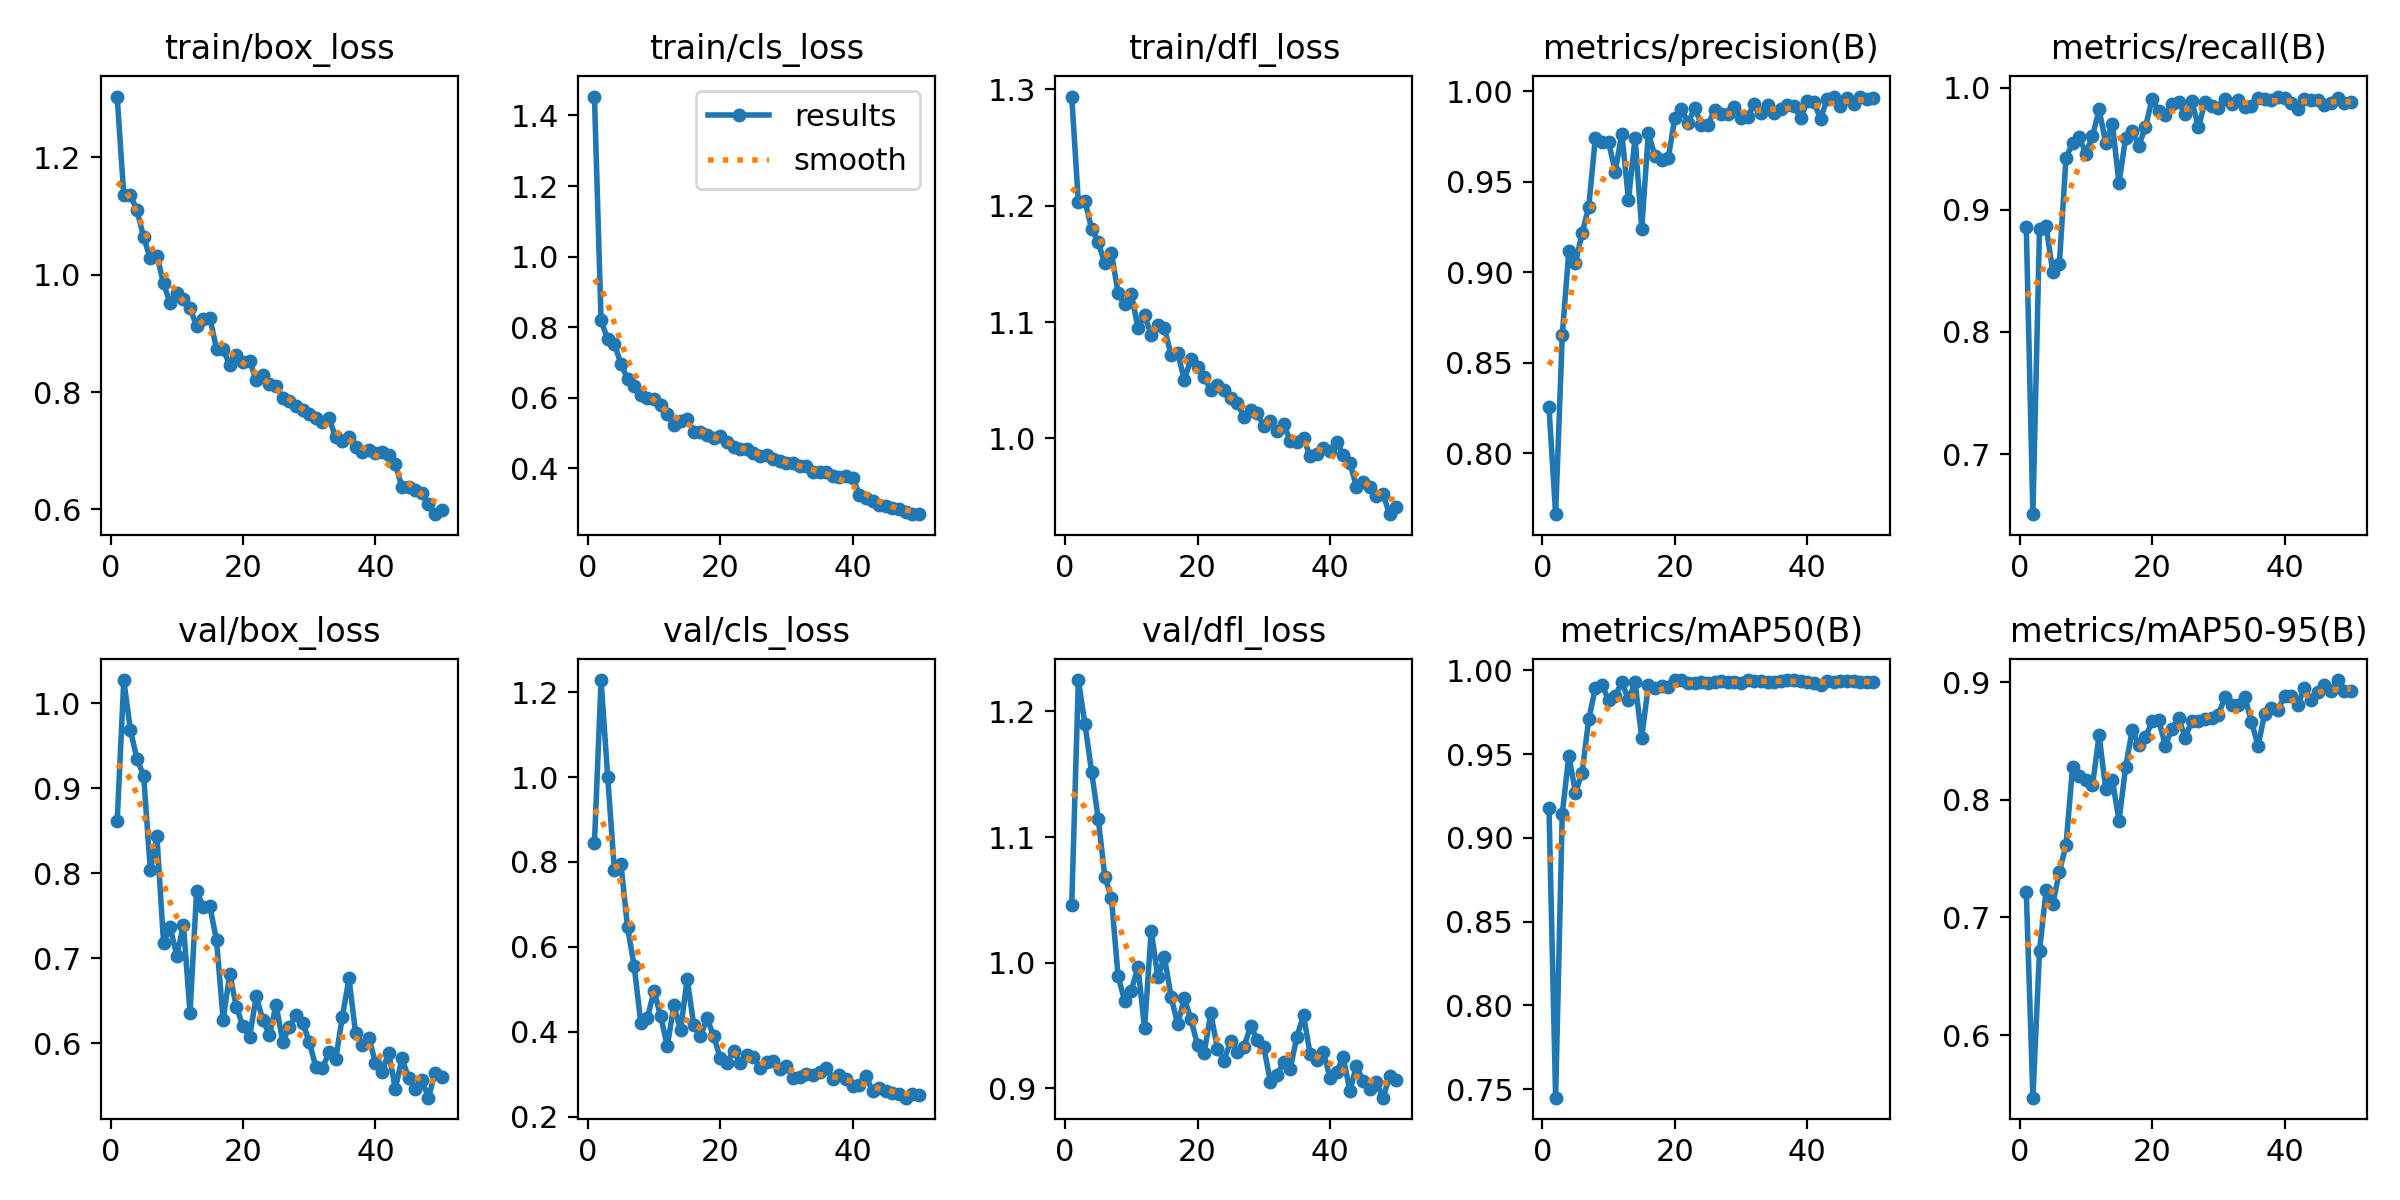

In [4]:
from IPython.display import Image
Image("/content/runs/detect/yolov11/results.png")

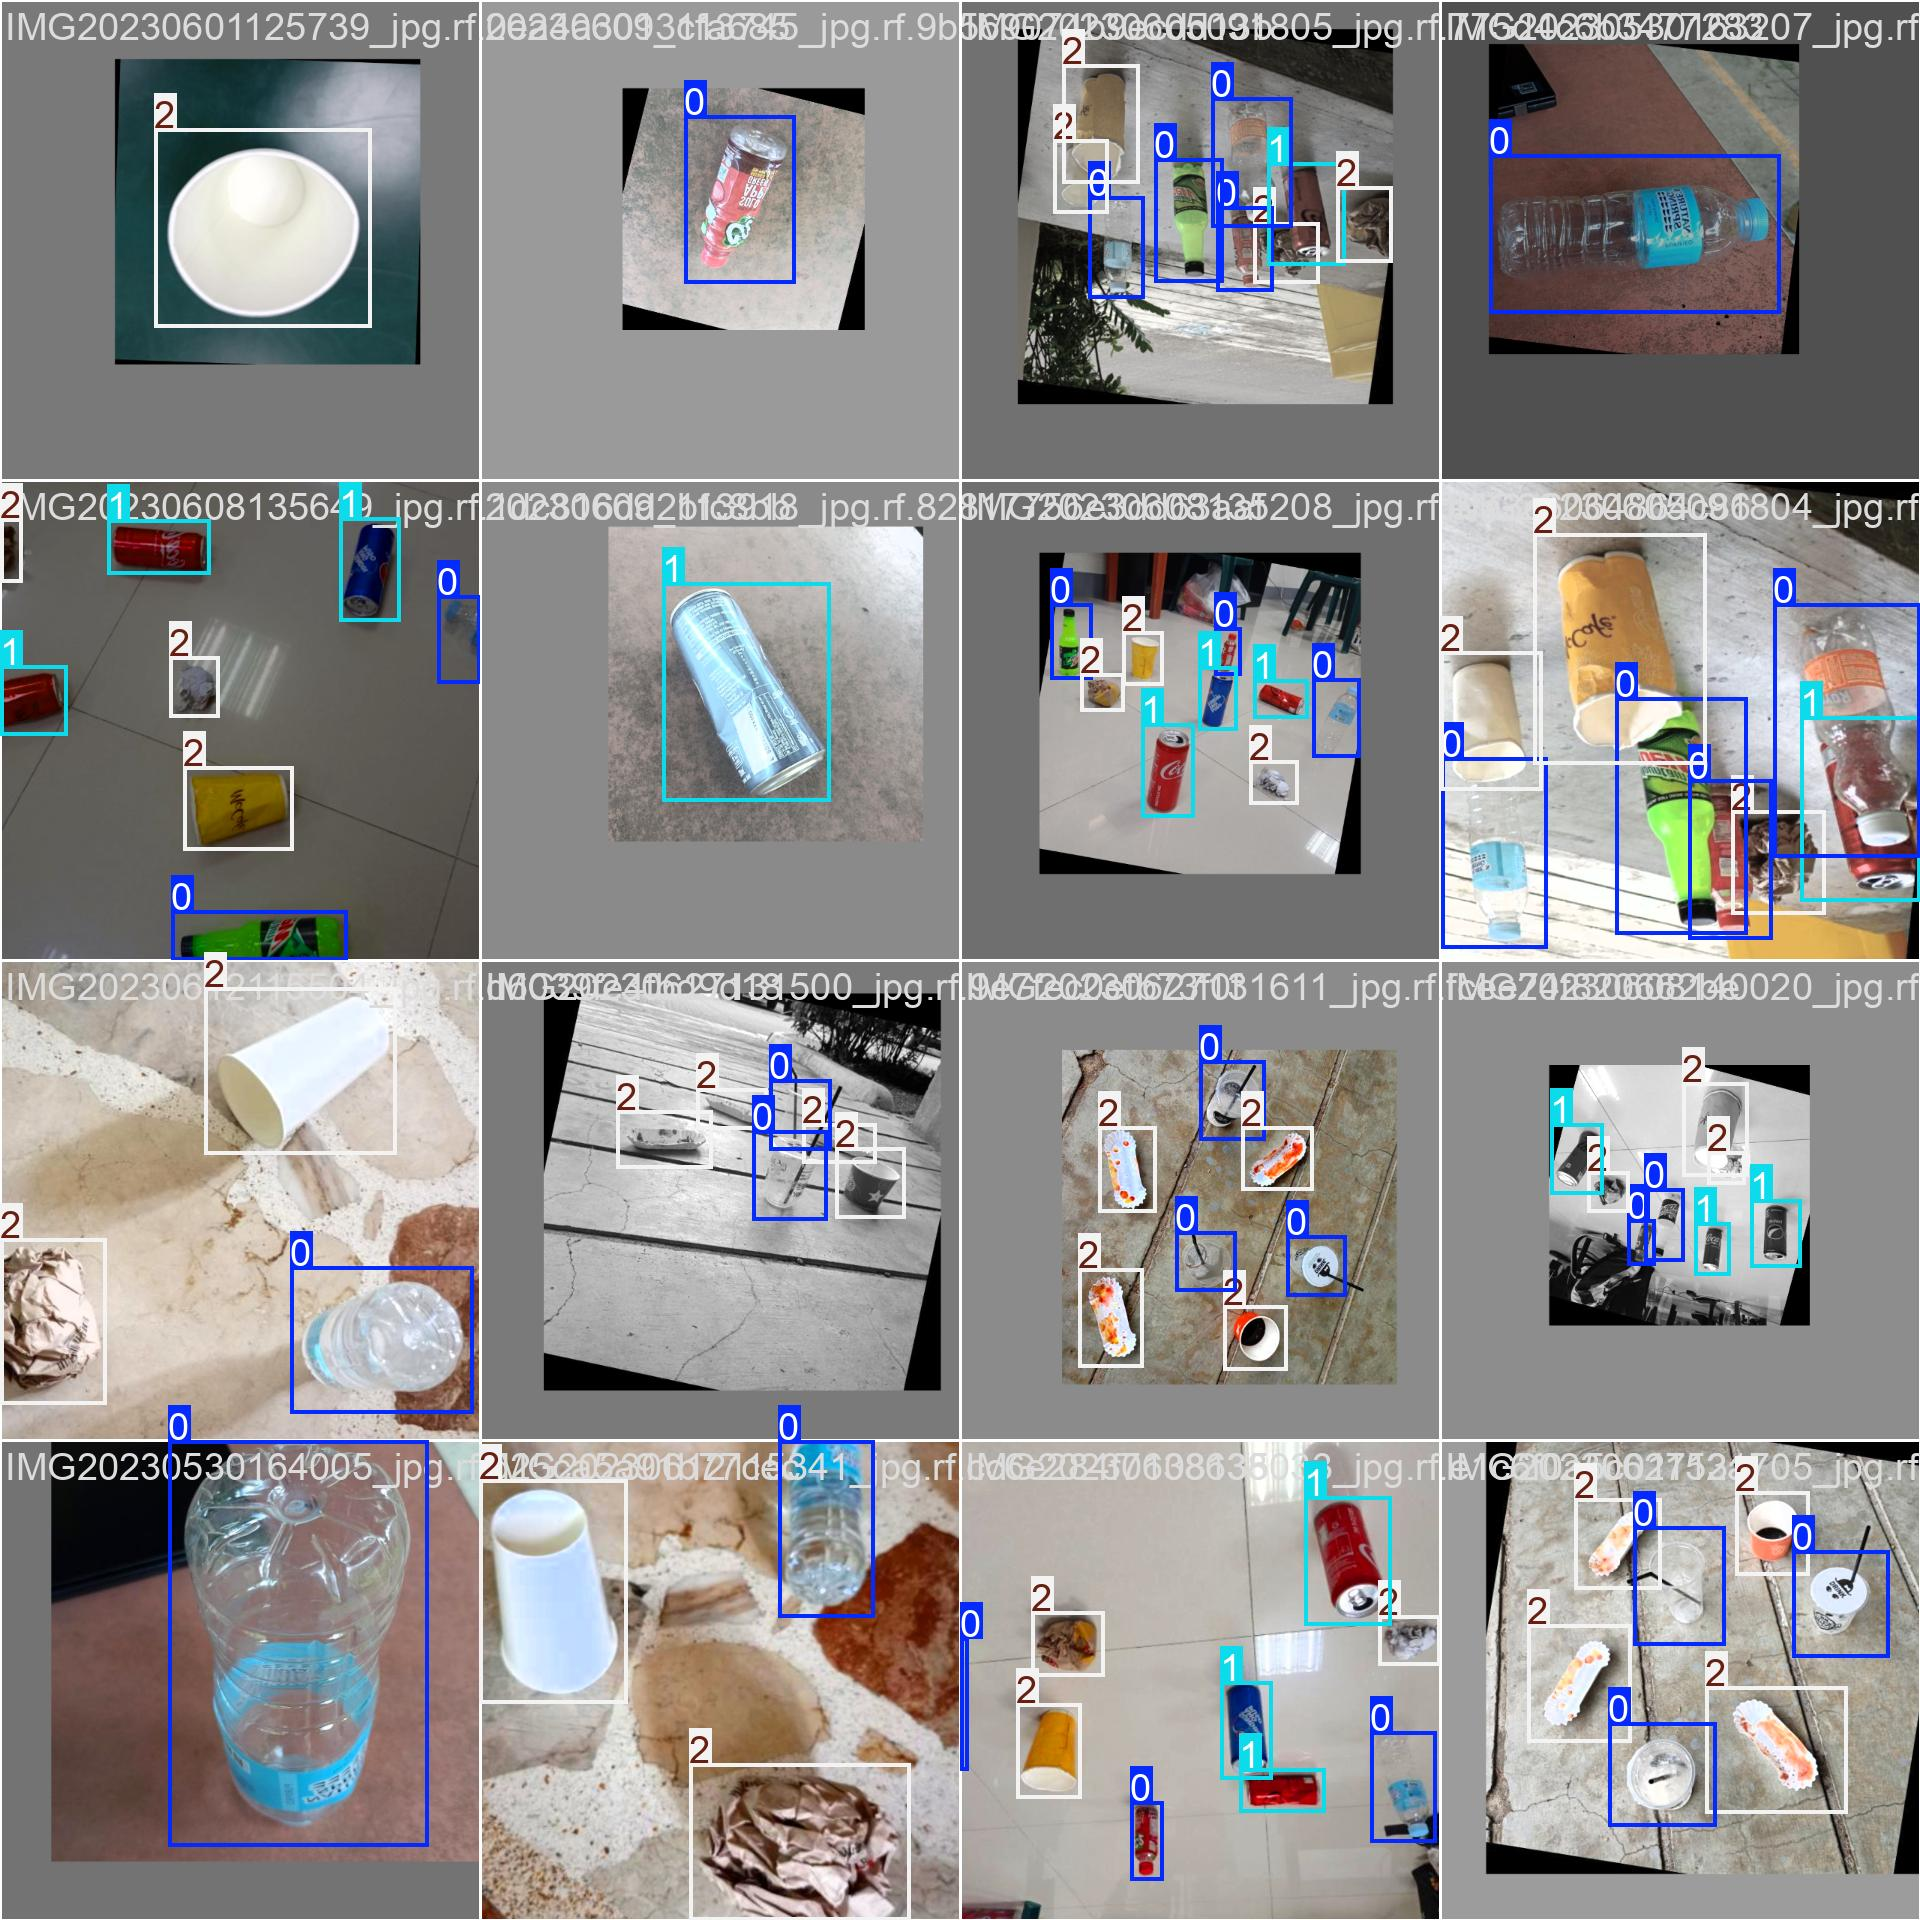

In [6]:
Image("/content/runs/detect/yolov11/train_batch2401.jpg")


image 1/1 /content/images (1).jpg: 448x640 2 Inorganics, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


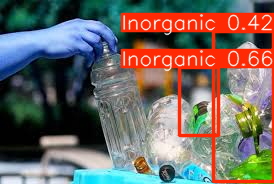

In [10]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

# Charger le modèle
model = YOLO("/content/runs/detect/yolov11/weights/best.pt")

# Faire la prédiction
results_list = model.predict("/content/images (1).jpg", conf=0.3, imgsz=640)


# Comme predict() retourne une liste, prendre le premier élément
results = results_list[0]

# Récupérer l'image annotée avec bounding boxes et labels
annotated_img = results.plot(labels=True)  # labels=True ajoute nom + score sur la boîte

# Afficher l'image annotée dans Colab
display(Image.fromarray(annotated_img))

results = results_list[0]


image 1/1 /content/z.jpg: 352x640 1 Organic, 69.6ms
Speed: 1.5ms preprocess, 69.6ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


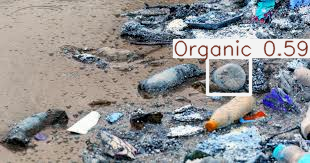

In [16]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

# Charger le modèle
model = YOLO("/content/runs/detect/yolov11/weights/best.pt")

# Faire la prédiction
results_list = model.predict("/content/z.jpg", conf=0.5, imgsz=640)


# Comme predict() retourne une liste, prendre le premier élément
results = results_list[0]

# Récupérer l'image annotée avec bounding boxes et labels
annotated_img = results.plot(labels=True)  # labels=True ajoute nom + score sur la boîte

# Afficher l'image annotée dans Colab
display(Image.fromarray(annotated_img))

results = results_list[0]